<a href="https://colab.research.google.com/github/aliyanshaikh7/CAD_PCG_Detection/blob/preprocessing-experiments/CAD_PCG_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q librosa

Import Libraries & Setup Paths

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import librosa
import librosa.display

# project paths
PROJECT_ROOT = '/content/drive/MyDrive/CAD_PCG_Detection'
DATA_FOLDER = f'{PROJECT_ROOT}/CAD_PCG_Dataset'

print(f'Project root: {PROJECT_ROOT}')
print(f'Data folder: {DATA_FOLDER}')

Project root: /content/drive/MyDrive/CAD_PCG_Detection
Data folder: /content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset


Extracting training and validation zip files

In [4]:
import zipfile

training_zip = f'{DATA_FOLDER}/training.zip'
if os.path.exists(training_zip):
  print("Extracting training.zip")
  with zipfile.ZipFile(training_zip, 'r') as zip_ref:
      zip_ref.extractall(DATA_FOLDER)
  os.remove(training_zip)

  print("Training data extracted and zip removed\n")
else:
  print("training.zip not found / already extracted")

validation_zip = f'{DATA_FOLDER}/validation.zip'
if os.path.exists(validation_zip):
  print("Extracting validation.zip")

  with zipfile.ZipFile(validation_zip, 'r') as zip_ref:
      zip_ref.extractall(DATA_FOLDER)
  os.remove(validation_zip)

  print("Validation data extracted and zip removed")
else:
  print("validation.zip not found / already extracted\n")

print("Extraction done")

training.zip not found / already extracted
validation.zip not found / already extracted

Extraction done


Inspecting the number of .wav files in the training datasets


In [5]:

print("CAD_PCG_Dataset folders:")
for item in sorted(os.listdir(DATA_FOLDER)):
    item_path = os.path.join(DATA_FOLDER, item)
    if os.path.isdir(item_path):
        wav_count = len([f for f in os.listdir(item_path) if f.endswith('.wav')])
        print(f"  • {item}: {wav_count} .wav files")

CAD_PCG_Dataset folders:
  • processed_data: 0 .wav files
  • training-a: 409 .wav files
  • training-b: 490 .wav files
  • training-b-e-augmented: 1435 .wav files
  • training-b-e-combined: 2631 .wav files
  • training-c: 31 .wav files
  • training-d: 55 .wav files
  • training-e: 2141 .wav files
  • training-f: 114 .wav files
  • validation: 301 .wav files


Inspecting class balance in training sets B and E (CAD related data)

In [6]:
print("Training-B:")
df_b = pd.read_csv(f'{DATA_FOLDER}/training-b/REFERENCE.csv', header=None, names=['filename', 'label'])

print(f"   Total: {len(df_b)}")
print(f"   Normal: {(df_b['label'] == -1).sum()} ({(df_b['label'] == -1).sum()/len(df_b)*100:.1f}%)")
print(f"   Abnormal: {(df_b['label'] == 1).sum()} ({(df_b['label'] == 1).sum()/len(df_b)*100:.1f}%)\n")


print("Training-E:")
df_e = pd.read_csv(f'{DATA_FOLDER}/training-e/REFERENCE.csv', header=None, names=['filename', 'label'])

print(f"   Total: {len(df_e)}")
print(f"   Normal: {(df_e['label'] == -1).sum()} ({(df_e['label'] == -1).sum()/len(df_e)*100:.1f}%)")
print(f"   Abnormal: {(df_e['label'] == 1).sum()} ({(df_e['label'] == 1).sum()/len(df_e)*100:.1f}%)\n")

print("Combined B + E:")
df_combined = pd.concat([df_b, df_e])

print(f"   Total: {len(df_combined)}")
print(f"   Normal: {(df_combined['label'] == -1).sum()} ({(df_combined['label'] == -1).sum()/len(df_combined)*100:.1f}%)")
print(f"   Abnormal: {(df_combined['label'] == 1).sum()} ({(df_combined['label'] == 1).sum()/len(df_combined)*100:.1f}%)")



Training-B:
   Total: 490
   Normal: 386 (78.8%)
   Abnormal: 104 (21.2%)

Training-E:
   Total: 2141
   Normal: 1958 (91.5%)
   Abnormal: 183 (8.5%)

Combined B + E:
   Total: 2631
   Normal: 2344 (89.1%)
   Abnormal: 287 (10.9%)


Visualise normal vs abnormal heart beat

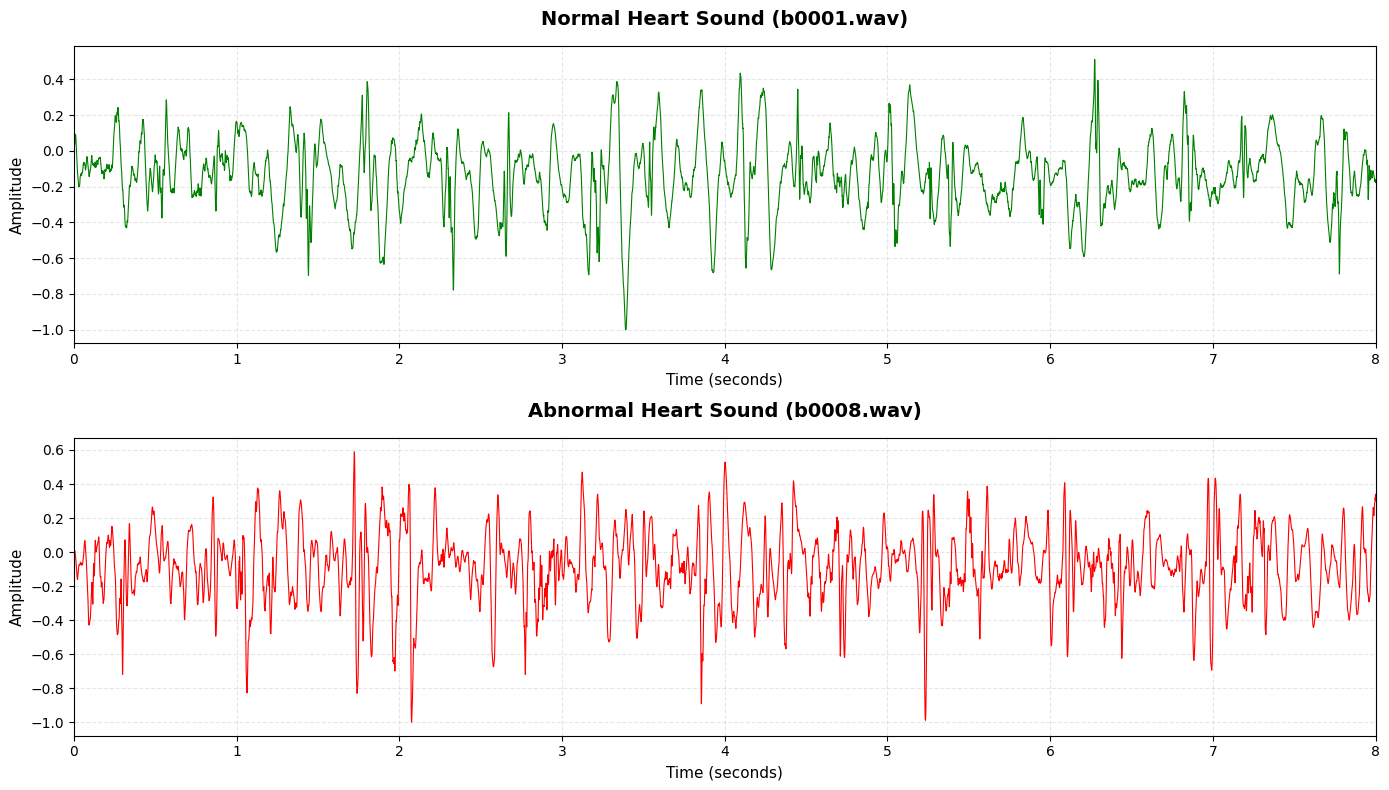


 Audio Statistics:

Normal (b0001.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5113]

Abnormal (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]


In [7]:

normal_path = f'{DATA_FOLDER}/training-b/b0001.wav'
normal_audio, sr = librosa.load(normal_path, sr=2000)

abnormal_path = f'{DATA_FOLDER}/training-b/b0008.wav'
abnormal_audio, sr = librosa.load(abnormal_path, sr=2000)

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# plot normal heart sound
axes[0].plot(np.arange(len(normal_audio)) / sr, normal_audio, color='green', linewidth=0.8)

axes[0].set_title('Normal Heart Sound (b0001.wav)', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Time (seconds)', fontsize=11)
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, len(normal_audio) / sr)

# plot abnormal heart sound
axes[1].plot(np.arange(len(abnormal_audio)) / sr, abnormal_audio, color='red', linewidth=0.8)
axes[1].set_title('Abnormal Heart Sound (b0008.wav)', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Time (seconds)', fontsize=11)
axes[1].set_ylabel('Amplitude', fontsize=11)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, len(abnormal_audio) / sr)

plt.tight_layout()
plt.show()

# print audio statistics
print(f"\n Audio Statistics:")
print(f"\nNormal (b0001.wav):")
print(f"  • Duration: {len(normal_audio) / sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(normal_audio)}")
print(f"  • Amplitude Range: [{normal_audio.min():.4f}, {normal_audio.max():.4f}]")

print(f"\nAbnormal (b0008.wav):")
print(f"  • Duration: {len(abnormal_audio) / sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(abnormal_audio)}")
print(f"  • Amplitude Range: [{abnormal_audio.min():.4f}, {abnormal_audio.max():.4f}]")

Defining audio augmentation functions such as time stretch, pitch stretch and adding noise to audio; in order to create variations of abnormal class samples

In [8]:
def time_stretch_audio(audio, rate):
  """
  Speed up or slow down audio

  Args:
    audio: numpy array - the input audio waveform
    rate: float - speed multiplier
      - rate > 1.0 - audio plays FASTER (compressed)
      - rate < 1.0 - audio plays SLOWER (stretched)
      - rate = 1.0 - audio plays with NORMAL SPEED
      - Example: rate=1.1 means audio will play 10% faster, rate=0.9 means audio will play 10% slower

  Returns:
    numpy array - time-streched audio waveform

  """
  return librosa.effects.time_stretch(y=audio, rate=rate)

def pitch_stretch_audio(audio, sr, n_steps):
  """
  Shift pitch up or down

  Args:
    audio: numpy array - the input audio waveform
    sr: int - sample rate (Hz)
    n_steps: int - number of semitones to shift pitch by
      - n_steps > 0 - shift pitch UP (higher frequency)
      - n_steps < 0 - shift pitch DOWN (lower frequency)
      - n_steps = 0 - no pitch shift
      - Example: n_steps=2 shifts up 2 semitones, n_steps=-2 shifts down 2 semitones

  Returns:
    numpy array - pitch-shifted audio waveform

  """
  return librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=n_steps)

def add_noise_audio(audio, noise_factor):
  """
  Add noise to audio

  Args:
        audio: numpy array - the input audio waveform
        noise_factor: float - amount of noise to add (standard deviation)
                      - 0.005 = 0.5% noise (subtle)
                      - 0.01 = 1% noise (moderate)
                      - Higher values = more noise (fuzzier sound)
                      - Lower values = less noise (cleaner sound)

    Returns:
        numpy array - audio with added Gaussian noise
  """
  noise = np.random.randn(len(audio))
  return audio + noise_factor * noise


Augmentating the original audio to be 10% faster

TIME STRETCH FAST (rate=1.1)


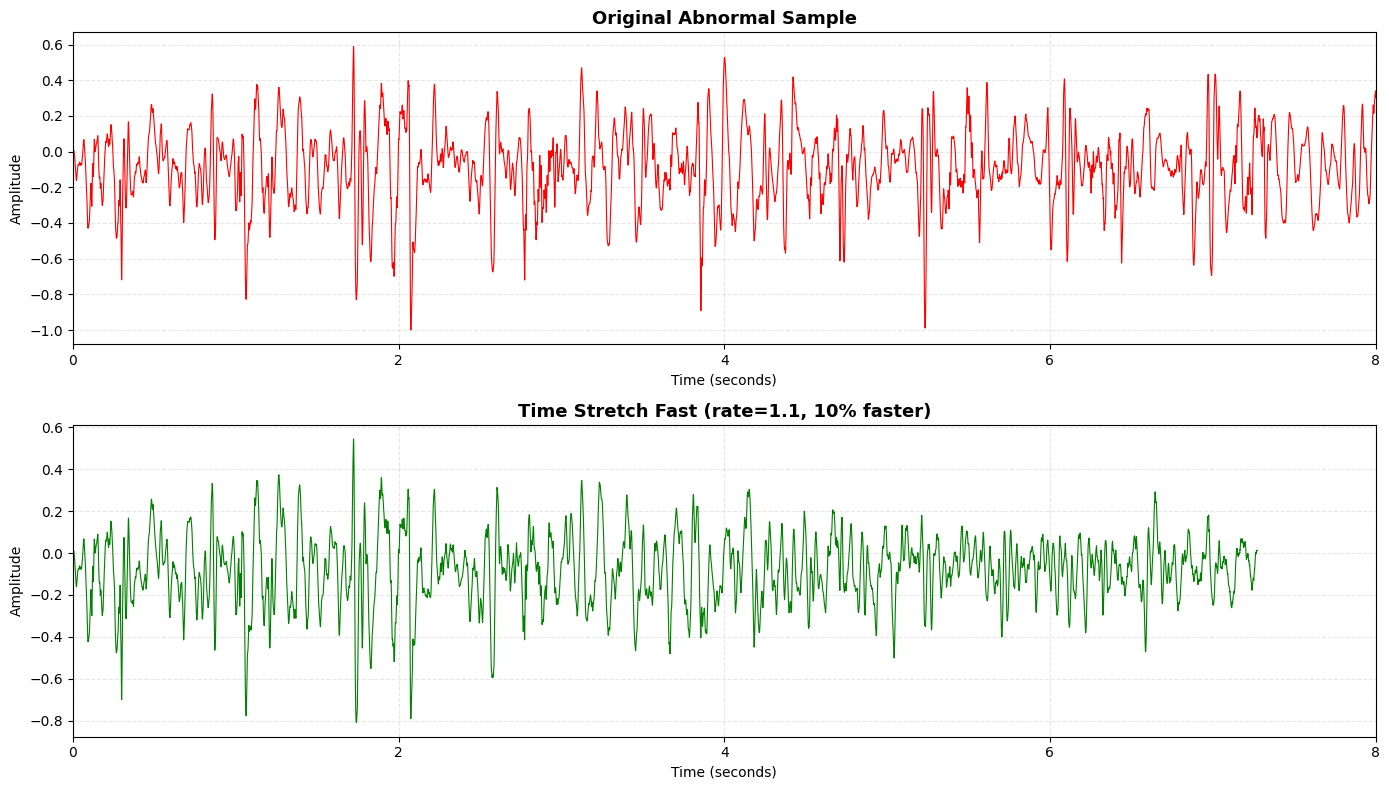


Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Time Stretched Fast (rate=1.1):
  • Duration: 7.27 seconds
  • Sample Rate: 2000 Hz
  • Samples: 14545
  • Amplitude Range: [-0.8080, 0.5434]

As we notice, the duration of the augmentated audio is shorter and the number of samples has also reduced


In [9]:


print("=" * 70)
print("TIME STRETCH FAST (rate=1.1)")
print("=" * 70)

original = abnormal_audio

aug_time_fast = time_stretch_audio(original, rate=1.1)

time_original = np.arange(len(original)) / sr
time_fast = np.arange(len(aug_time_fast)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 8)
axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: Time Stretch Fast
axes[1].plot(time_fast, aug_time_fast, color='green', linewidth=0.8)
axes[1].set_title('Time Stretch Fast (rate=1.1, 10% faster)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 8)
axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()


print("\nAudio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nTime Stretched Fast (rate=1.1):")
print(f"  • Duration: {len(aug_time_fast)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_time_fast)}")
print(f"  • Amplitude Range: [{aug_time_fast.min():.4f}, {aug_time_fast.max():.4f}]")

print("\nAs we notice, the duration of the augmentated audio is shorter and the number of samples has also reduced")

Augmentating the original audio to be 10% slower

TIME STRETCH SLOW (rate=0.9)


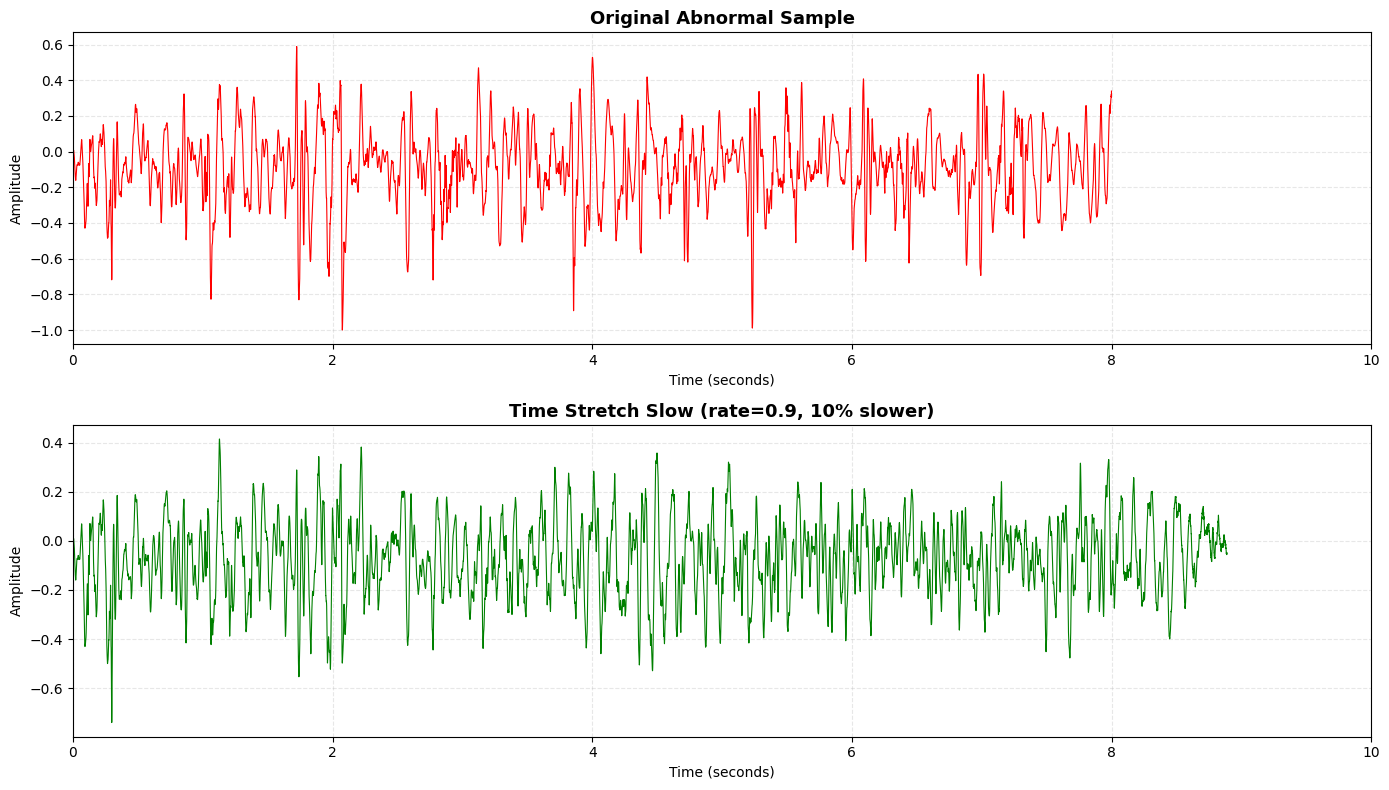


Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Time Stretched Slow (rate=0.9):
  • Duration: 8.89 seconds
  • Sample Rate: 2000 Hz
  • Samples: 17778
  • Amplitude Range: [-0.7401, 0.4144]

As we notice, the duration of the augmentated audio is longer and the number of samples has also increased


In [10]:

print("=" * 70)
print("TIME STRETCH SLOW (rate=0.9)")
print("=" * 70)

original = abnormal_audio

# Apply time stretch slow
aug_time_slow = time_stretch_audio(original, rate=0.9)

# Create time axes
time_original = np.arange(len(original)) / sr
time_slow = np.arange(len(aug_time_slow)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 10)  # Extended to 10s to show the longer slow version
axes[0].set_xticks([0, 2, 4, 6, 8, 10])

# Plot 2: Time Stretch Slow
axes[1].plot(time_slow, aug_time_slow, color='green', linewidth=0.8)
axes[1].set_title('Time Stretch Slow (rate=0.9, 10% slower)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 10)  # Extended to 10s to show full slow version
axes[1].set_xticks([0, 2, 4, 6, 8, 10])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nAudio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nTime Stretched Slow (rate=0.9):")
print(f"  • Duration: {len(aug_time_slow)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_time_slow)}")
print(f"  • Amplitude Range: [{aug_time_slow.min():.4f}, {aug_time_slow.max():.4f}]")

print("\nAs we notice, the duration of the augmentated audio is longer and the number of samples has also increased")


Augmenting the audio to shift up in pitch by 2 semitones

PITCH SHIFT UP (n_steps=+2)


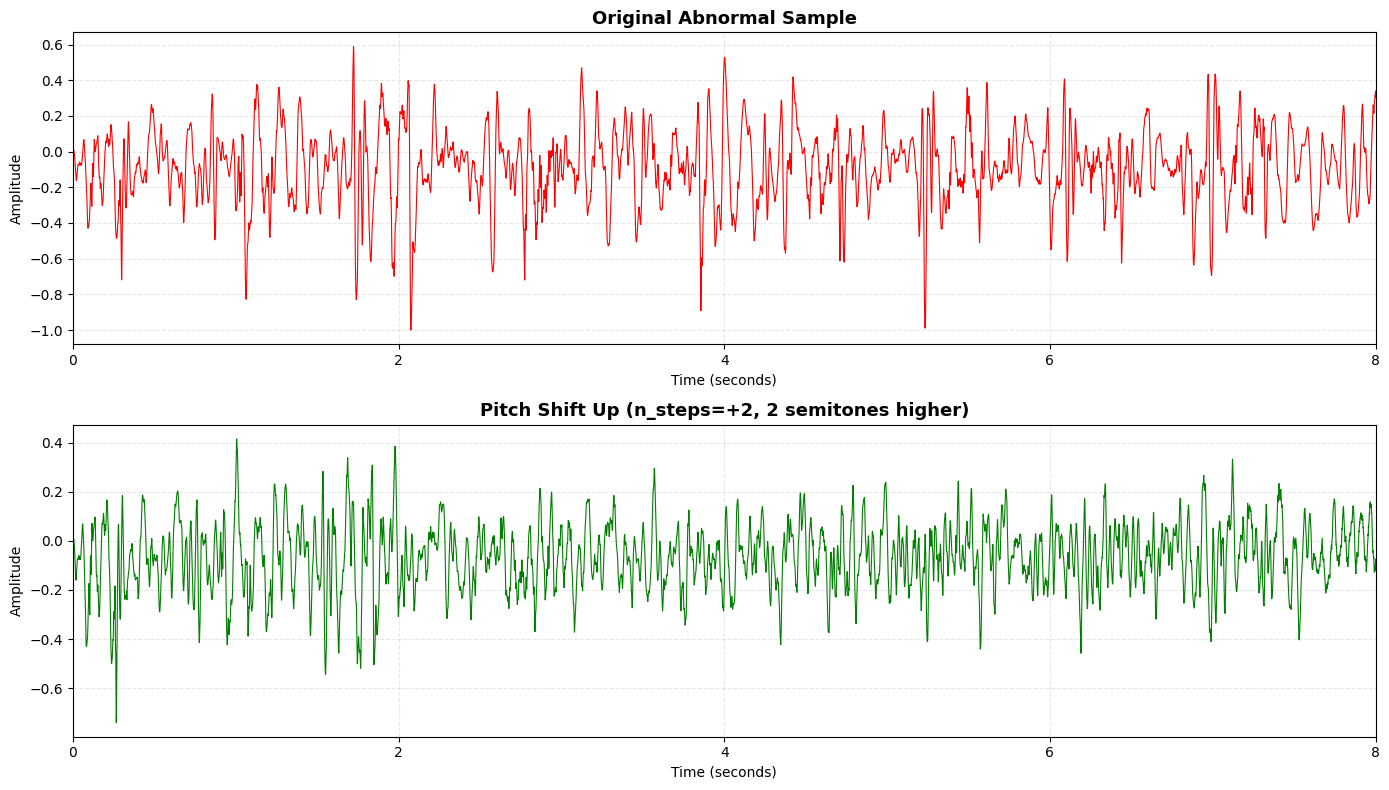


 Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Pitch Shifted Up (n_steps=+2):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-0.7401, 0.4150]


In [11]:
# Testing Pitch Shift UP

print("=" * 70)
print("PITCH SHIFT UP (n_steps=+2)")
print("=" * 70)

original = abnormal_audio

# Apply pitch shift up
aug_pitch_up = pitch_stretch_audio(original, sr, n_steps=2)

# Create time axes
time_original = np.arange(len(original)) / sr
time_pitch_up = np.arange(len(aug_pitch_up)) / sr


fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 8)
axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: Pitch Shift Up
axes[1].plot(time_pitch_up, aug_pitch_up, color='green', linewidth=0.8)
axes[1].set_title('Pitch Shift Up (n_steps=+2, 2 semitones higher)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 8)
axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\n Audio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nPitch Shifted Up (n_steps=+2):")
print(f"  • Duration: {len(aug_pitch_up)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_pitch_up)}")
print(f"  • Amplitude Range: [{aug_pitch_up.min():.4f}, {aug_pitch_up.max():.4f}]")

## Spectral Centroid Analysis

As it is not visually evident that the frequency of the augmented sound has changed, we can quantify the change in frequency by using spectral centroid analysis.

### What is Spectral Centroid?

* The "center of mass" of the frequency spectrum - the weighted average frequency
* Formula: `Σ(frequency × magnitude) / Σ(magnitude)`
* Higher centroid = "brighter" sound (more high-frequency content)
* Lower centroid = "darker" sound (more low-frequency content)

### Expected for ±2 Semitone Shift

* Centroid should change by approximately **10-15%** in the direction of the pitch shift

In [12]:


centroid_original = librosa.feature.spectral_centroid(y=original, sr=sr)

centroid_pitch_up = librosa.feature.spectral_centroid(y=aug_pitch_up, sr=sr)

# Take mean across time
mean_centroid_original = np.mean(centroid_original)
mean_centroid_pitch_up = np.mean(centroid_pitch_up)

print(f"\n Spectral Centroid Analysis:")
print(f"  • Original spectral centroid: {mean_centroid_original:.2f} Hz")
print(f"  • Pitch shifted spectral centroid: {mean_centroid_pitch_up:.2f} Hz")
print(f"  • Frequency shift: {mean_centroid_pitch_up - mean_centroid_original:.2f} Hz")
print(f"  • Percentage increase: {((mean_centroid_pitch_up/mean_centroid_original - 1) * 100):.1f}%")


 Spectral Centroid Analysis:
  • Original spectral centroid: 38.09 Hz
  • Pitch shifted spectral centroid: 42.46 Hz
  • Frequency shift: 4.37 Hz
  • Percentage increase: 11.5%


Augmenting the audio to shift down in pitch by 2 semitones

PITCH SHIFT DOWN (n_steps=-2)


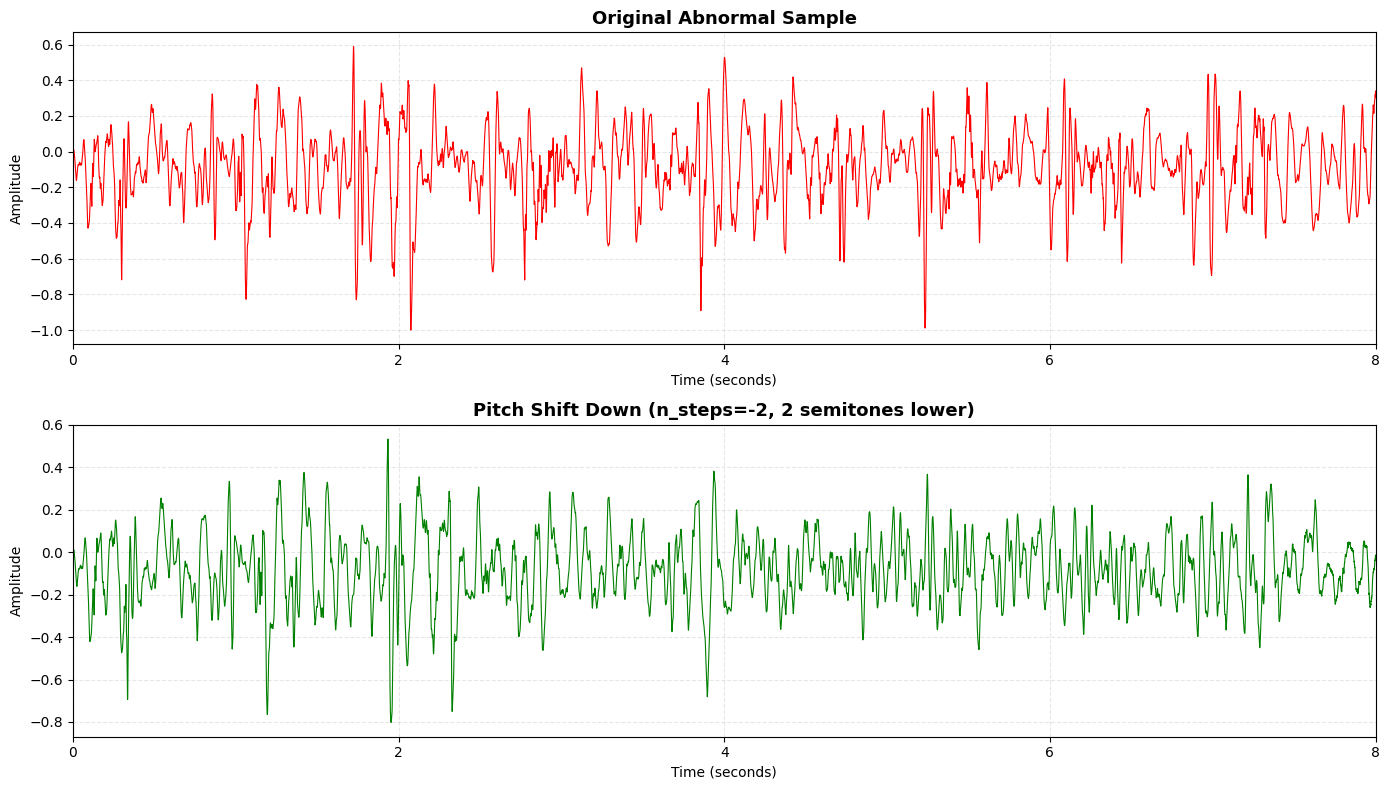


Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Pitch Shifted Down (n_steps=-2):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-0.8028, 0.5332]


In [13]:


print("=" * 70)
print("PITCH SHIFT DOWN (n_steps=-2)")
print("=" * 70)

original = abnormal_audio

aug_pitch_down = pitch_stretch_audio(original, sr, n_steps=-2)

# Create time axes
time_original = np.arange(len(original)) / sr
time_pitch_down = np.arange(len(aug_pitch_down)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 8)
axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: Pitch Shift Down
axes[1].plot(time_pitch_down, aug_pitch_down, color='green', linewidth=0.8)
axes[1].set_title('Pitch Shift Down (n_steps=-2, 2 semitones lower)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 8)
axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nAudio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nPitch Shifted Down (n_steps=-2):")
print(f"  • Duration: {len(aug_pitch_down)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_pitch_down)}")
print(f"  • Amplitude Range: [{aug_pitch_down.min():.4f}, {aug_pitch_down.max():.4f}]")


In [14]:
centroid_original = librosa.feature.spectral_centroid(y=original, sr=sr)
centroid_pitch_down = librosa.feature.spectral_centroid(y=aug_pitch_down, sr=sr)

mean_centroid_original = np.mean(centroid_original)
mean_centroid_pitch_down = np.mean(centroid_pitch_down)

print(f"\n Spectral Centroid Analysis:")
print(f"  • Original spectral centroid: {mean_centroid_original:.2f} Hz")
print(f"  • Pitch shifted down spectral centroid: {mean_centroid_pitch_down:.2f} Hz")
print(f"  • Frequency shift: {mean_centroid_pitch_down - mean_centroid_original:.2f} Hz")
print(f"  • Percentage decrease: {((mean_centroid_pitch_down/mean_centroid_original - 1) * 100):.1f}%")


 Spectral Centroid Analysis:
  • Original spectral centroid: 38.09 Hz
  • Pitch shifted down spectral centroid: 31.25 Hz
  • Frequency shift: -6.84 Hz
  • Percentage decrease: -18.0%


For clearer visibility we can capture the first 2 seconds rather than all 8 seconds

ZOOMED COMPARISON: PITCH SHIFT VISUALIZATION


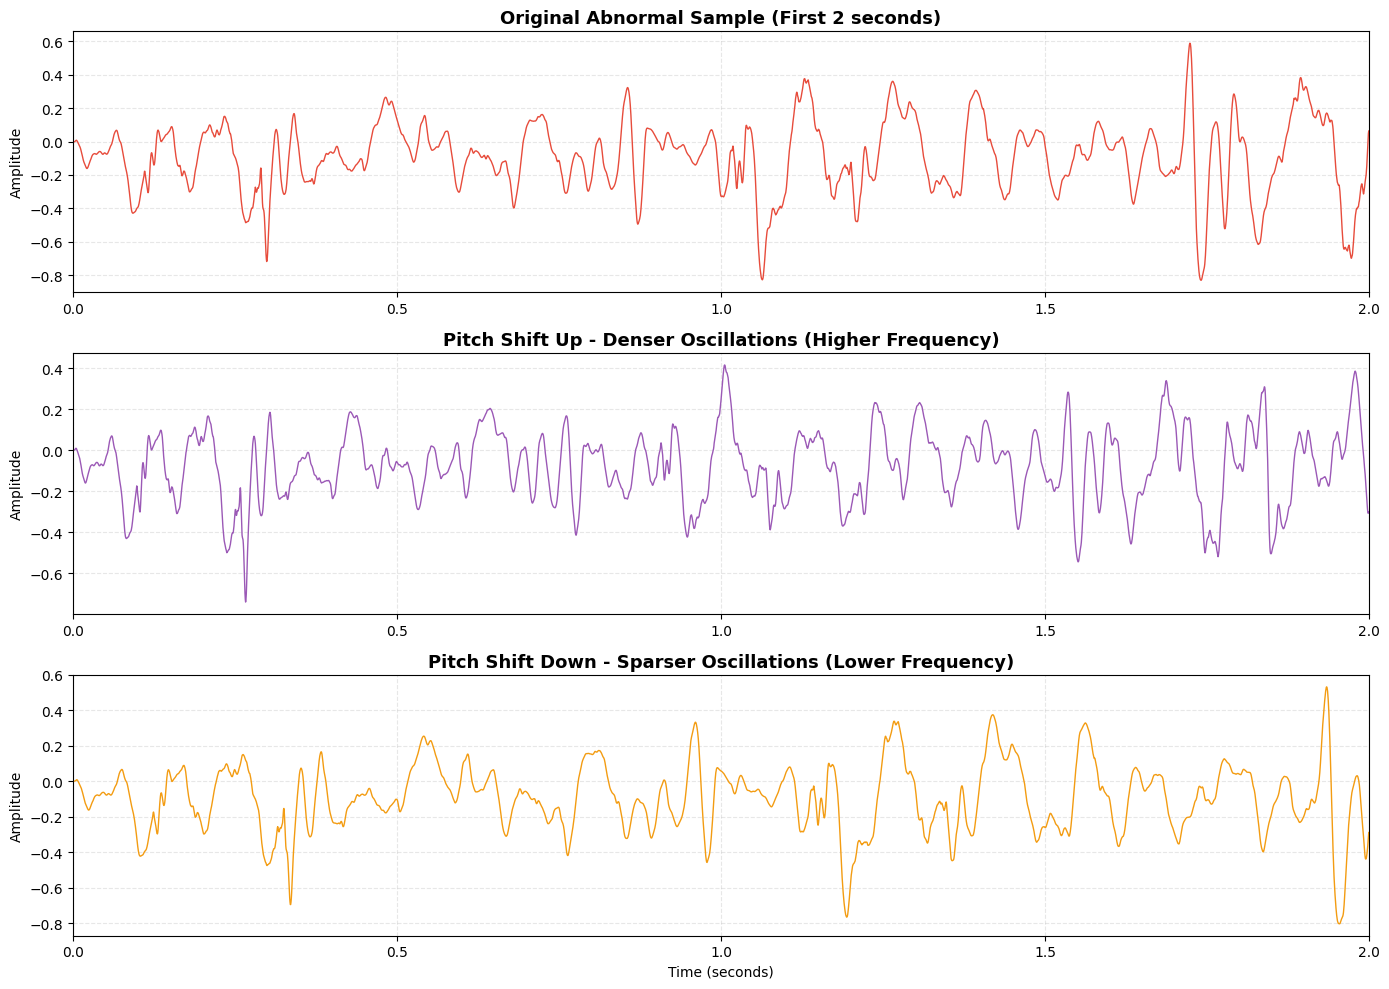


 Visual Observation:
  • Original: Baseline oscillation pattern
  • Pitch Up: More waves packed into same time (denser/tighter)
  • Pitch Down: Fewer waves in same time (sparser/wider)
  • All three maintain same heartbeat timing and structure


In [15]:

print("=" * 70)
print("ZOOMED COMPARISON: PITCH SHIFT VISUALIZATION")
print("=" * 70)

# use 2-second window for detailed view
zoom_duration = 2
zoom_samples = zoom_duration * sr

# extract zoomed portions
original_zoom = original[:zoom_samples]
pitch_up_zoom = aug_pitch_up[:zoom_samples]
pitch_down_zoom = aug_pitch_down[:zoom_samples]

# create time axis
time_zoom = np.arange(zoom_samples) / sr

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Plot 1: Original
axes[0].plot(time_zoom, original_zoom, color='#e74c3c', linewidth=1.0)
axes[0].set_title('Original Abnormal Sample (First 2 seconds)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, zoom_duration)
axes[0].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

# Plot 2: Pitch Up
axes[1].plot(time_zoom, pitch_up_zoom, color='#9b59b6', linewidth=1.0)
axes[1].set_title('Pitch Shift Up - Denser Oscillations (Higher Frequency)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, zoom_duration)
axes[1].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

# Plot 3: Pitch Down
axes[2].plot(time_zoom, pitch_down_zoom, color='#f39c12', linewidth=1.0)
axes[2].set_title('Pitch Shift Down - Sparser Oscillations (Lower Frequency)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Time (seconds)', fontsize=10)
axes[2].set_ylabel('Amplitude', fontsize=10)
axes[2].grid(True, alpha=0.3, linestyle='--')
axes[2].set_xlim(0, zoom_duration)
axes[2].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

plt.tight_layout()
plt.show()

print(f"\n Visual Observation:")
print(f"  • Original: Baseline oscillation pattern")
print(f"  • Pitch Up: More waves packed into same time (denser/tighter)")
print(f"  • Pitch Down: Fewer waves in same time (sparser/wider)")
print(f"  • All three maintain same heartbeat timing and structure")

Augmenting the audio to have Gaussian noise

GAUSSIAN NOISE ADDITION


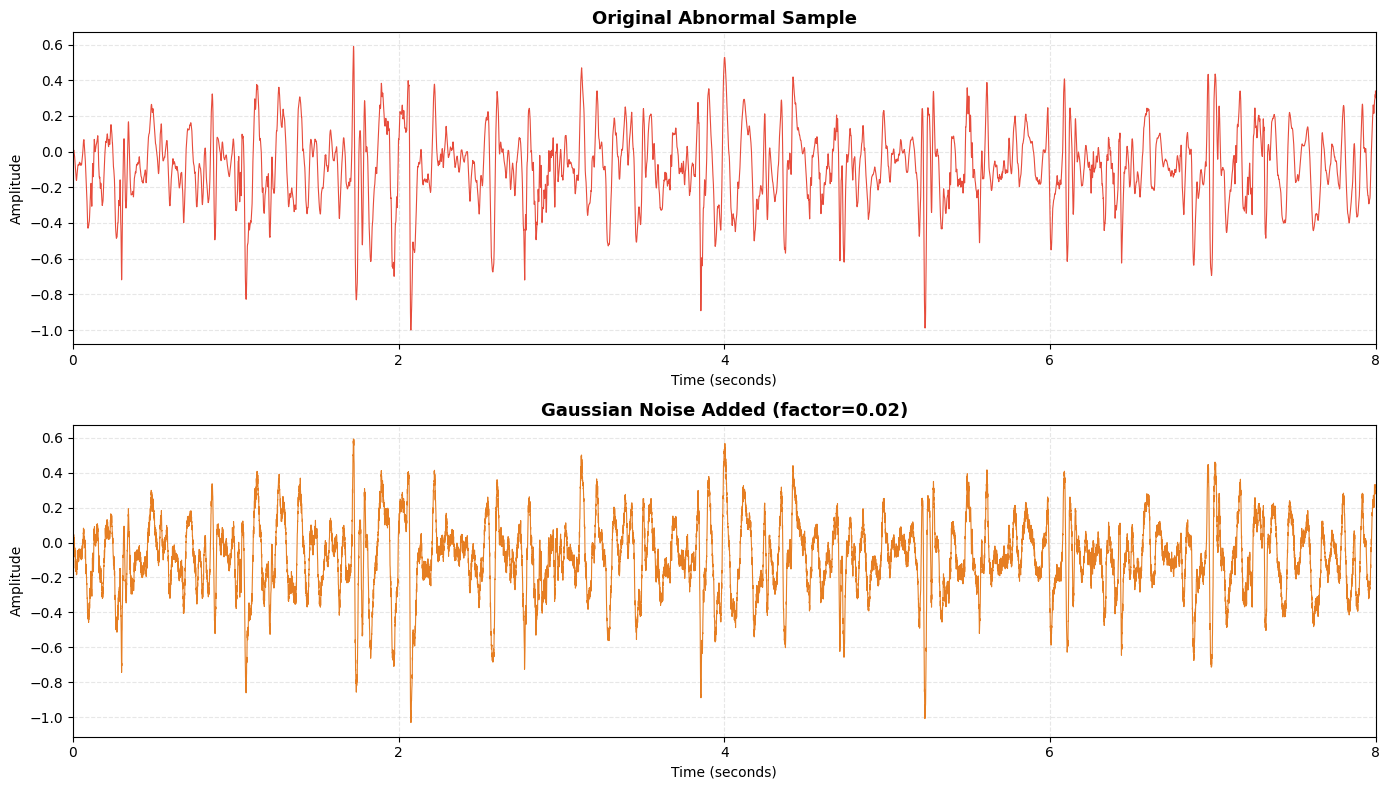


 Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

With Gaussian Noise (factor=0.01):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0300, 0.5924]


In [16]:
print("=" * 70)
print("GAUSSIAN NOISE ADDITION")
print("=" * 70)

original = abnormal_audio

# add Gaussian noise
aug_noise = add_noise_audio(original, noise_factor=0.02)

# create time axes
time_original = np.arange(len(original)) / sr
time_noise = np.arange(len(aug_noise)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='#e74c3c', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 8)
axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: With Noise
axes[1].plot(time_noise, aug_noise, color='#e67e22', linewidth=0.8)
axes[1].set_title('Gaussian Noise Added (factor=0.02)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 8)
axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\n Audio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nWith Gaussian Noise (factor=0.01):")
print(f"  • Duration: {len(aug_noise)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_noise)}")
print(f"  • Amplitude Range: [{aug_noise.min():.4f}, {aug_noise.max():.4f}]")



## Signal-to-Noise Ratio (SNR) Analysis

### Why SNR?

Visual inspection shows noise adds "fuzziness," but SNR quantifies the noise level.

### What is SNR?

**SNR = Ratio of signal power to noise power (in decibels)**

Formula: `SNR (dB) = 10 × log₁₀(Signal Power / Noise Power)`

Where:
  - Signal Power = Mean of squared original audio values
  - Noise Power = Mean of squared noise values (difference between noisy and original)
  - dB = Decibels (logarithmic scale)

### Expected Result

For **noise factor = 0.02**: SNR should be ~**20-25 dB**

This indicates appropriate augmentation - enough variation without destroying the heartbeat structure.

In [17]:


# calculate signal power
signal_power = np.mean(original ** 2)

# calculate noise (difference between noisy and original)
noise = aug_noise - original
noise_power = np.mean(noise ** 2)

# convert SNR to decibels
snr_db = 10 * np.log10(signal_power / noise_power)

print(f"\n Signal-to-Noise Ratio (SNR):")
print(f"  • Signal power: {signal_power:.6f}")
print(f"  • Noise power: {noise_power:.6f}")
print(f"  • SNR: {snr_db:.2f} dB")

print(f"\n SNR Interpretation:")
if snr_db > 25:
    print(f"  • Very clean signal - minimal noise added")
elif snr_db > 15:
    print(f"  • Good balance - noticeable noise but signal preserved ")
elif snr_db > 10:
    print(f"  • Moderate noise - signal still recognizable")
else:
    print(f"  • Heavy noise - signal may be degraded ")



 Signal-to-Noise Ratio (SNR):
  • Signal power: 0.050299
  • Noise power: 0.000405
  • SNR: 20.94 dB

 SNR Interpretation:
  • Good balance - noticeable noise but signal preserved 


For clearer visibility we can capture the first 2 seconds rather than all 8 seconds

ZOOMED COMPARISON: GAUSSIAN NOISE VISUALIZATION


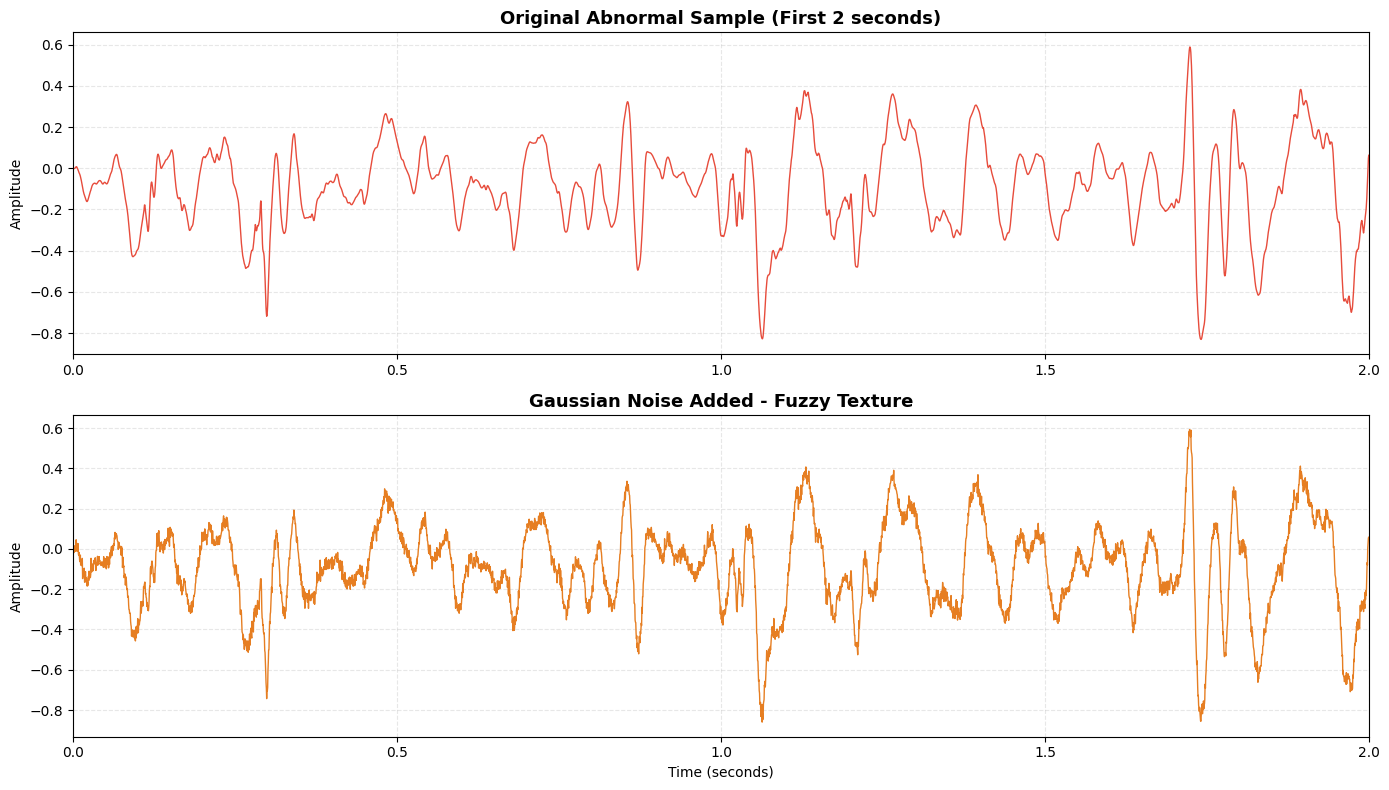


 Visual Observation:
  • Original: Relatively smooth waveform
  • With Noise: Added 'fuzziness' throughout
  • Heartbeat structure preserved, but with random variations


In [18]:

print("=" * 70)
print("ZOOMED COMPARISON: GAUSSIAN NOISE VISUALIZATION")
print("=" * 70)

# Use 2-second window for detailed view
zoom_duration = 2
zoom_samples = zoom_duration * sr

# extract zoomed portions
original_zoom = original[:zoom_samples]
noise_zoom = aug_noise[:zoom_samples]

# create time axis
time_zoom = np.arange(zoom_samples) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_zoom, original_zoom, color='#e74c3c', linewidth=1.0)
axes[0].set_title('Original Abnormal Sample (First 2 seconds)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, zoom_duration)
axes[0].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

# Plot 2: With Noise
axes[1].plot(time_zoom, noise_zoom, color='#e67e22', linewidth=1.0)
axes[1].set_title('Gaussian Noise Added - Fuzzy Texture', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, zoom_duration)
axes[1].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

plt.tight_layout()
plt.show()

print(f"\n Visual Observation:")
print(f"  • Original: Relatively smooth waveform")
print(f"  • With Noise: Added 'fuzziness' throughout")
print(f"  • Heartbeat structure preserved, but with random variations")


In [19]:
!pip install soundfile


In [20]:
import soundfile as sf
print(f"soundfile version: {sf.__version__}")

soundfile version: 0.13.1


Combining training sets B and E into one training set

In [21]:
import shutil

df_combined = pd.concat([df_b, df_e], ignore_index=True)

print(f"\n Dataset Summary:")
print(f"  • Training-B: {len(df_b)} files")
print(f"  • Training-E: {len(df_e)} files")
print(f"  • Combined Total: {len(df_combined)} files")
print(f"  • Normal: {(df_combined['label'] == -1).sum()}")
print(f"  • Abnormal: {(df_combined['label'] == 1).sum()}")

combined_dir = f'{DATA_FOLDER}/training-b-e-combined'
os.makedirs(combined_dir, exist_ok=True)


 Dataset Summary:
  • Training-B: 490 files
  • Training-E: 2141 files
  • Combined Total: 2631 files
  • Normal: 2344
  • Abnormal: 287


Copy all files from original to combined directory

In [22]:
print(f"\n Copying files to combined directory...")

copied_count = 0

print(f"Total files to copy: {len(df_combined)}")
print(f"Starting loop...")

for idx, row in df_combined.iterrows():
    filename = row['filename']

    # Determine source folder based on filename prefix
    if filename.startswith('b'):
        source_path = f'{DATA_FOLDER}/training-b/{filename}.wav'
    elif filename.startswith('e'):
        source_path = f'{DATA_FOLDER}/training-e/{filename}.wav'
    else:
        print(f" Warning: Unknown prefix for {filename}")
        continue

    # Destination path
    dest_path = f'{combined_dir}/{filename}.wav'

    # Copy file if file does not already exist
    if not os.path.exists(dest_path):
      shutil.copy2(source_path, dest_path)
      copied_count += 1
    else:
      continue

    # Progress indicator (every 500 files)
    if copied_count % 500 == 0:
        print(f"  Copied {copied_count}/{len(df_combined)} files...")

print(f" Copied {copied_count} files successfully")


 Copying files to combined directory...
Total files to copy: 2631
Starting loop...
 Copied 0 files successfully


Saving class labels to REFERENCE.CSV

In [23]:
print(f"\n Saving REFERENCE.csv...")
df_combined.to_csv(f'{combined_dir}/REFERENCE.csv', index=False, header=False)
print(f"REFERENCE.csv saved with {len(df_combined)} entries")
print(f"\nCombined Dataset Summary:")
print(f"  • Normal: {(df_combined['label'] == -1).sum()}")
print(f"  • Abnormal: {(df_combined['label'] == 1).sum()}")
print(f"  • Total: {len(df_combined)}")




 Saving REFERENCE.csv...
REFERENCE.csv saved with 2631 entries

Combined Dataset Summary:
  • Normal: 2344
  • Abnormal: 287
  • Total: 2631


Applying augmentations to abnormal samples

In [24]:
print(f"\nGenerating augmented versions of abnormal samples...")

augmented_dir = f'{DATA_FOLDER}/training-b-e-augmented'
os.makedirs(augmented_dir, exist_ok=True)

# Check if the augmented directory is empty
if os.path.exists(augmented_dir) and len(os.listdir(augmented_dir)) > 0:
    print(f"Augmented directory '{augmented_dir}' is not empty. Skipping augmentation.")
else:
    print(f"Augmented directory '{augmented_dir}' is empty or does not exist. Proceeding with augmentation.")

    # get all abnormal samples
    abnormal_samples = df_combined[df_combined['label'] == 1]
    print(f"  • Abnormal samples to augment: {len(abnormal_samples)}")

    augmented_count = 0

    for idx, row in abnormal_samples.iterrows():
        filename = row['filename']

        audio_path = f'{combined_dir}/{filename}.wav'
        audio, sr = librosa.load(audio_path, sr=2000)

        augmentations = [
            (time_stretch_audio(audio, rate=1.1), f"{filename}_time_fast"),
            (time_stretch_audio(audio, rate=0.9), f"{filename}_time_slow"),
            (pitch_stretch_audio(audio, sr, n_steps=2), f"{filename}_pitch_up"),
            (pitch_stretch_audio(audio, sr, n_steps=-2), f"{filename}_pitch_down"),
            (add_noise_audio(audio, noise_factor=0.02), f"{filename}_noisy")
        ]

        for aug_audio, aug_filename in augmentations:
          output_path = f'{augmented_dir}/{aug_filename}.wav'
          # write soundfile as a .wav file
          sf.write(output_path, aug_audio, sr)
          augmented_count += 1

        # print progress every 50 samples
        if ((abnormal_samples.index.get_loc(idx) + 1) % 50) == 0:
            print(f"  Processed {abnormal_samples.index.get_loc(idx) + 1}/{len(abnormal_samples)} abnormal samples ({augmented_count} files generated)...")

    print(f"Generated {augmented_count} augmented files")


Generating augmented versions of abnormal samples...
Augmented directory '/content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/training-b-e-augmented' is not empty. Skipping augmentation.


Verify the number of augmented files

### Expected Output

`287 x 5 = 1435`

As there are 287 abnormal samples and 5 augmentation functions

In [25]:

augmented_dir = f'{DATA_FOLDER}/training-b-e-augmented'
if os.path.exists(augmented_dir):
    augmented_wav_files = [f for f in os.listdir(augmented_dir) if f.endswith('.wav')]
    print(f"Number of .wav files in '{augmented_dir}': {len(augmented_wav_files)}")
else:
    print(f"Directory not found: {augmented_dir}")

Number of .wav files in '/content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/training-b-e-augmented': 1435


Standardise Class Labels for Binary Classification (Normal: 0, Abnormal: 1)

In [26]:
reference_path = f'{combined_dir}/REFERENCE.csv'
print(f"Loading REFERENCE.csv: {reference_path}")

try:
  df_combined = pd.read_csv(reference_path, header=None, names=['filename', 'label'])

  print("\nDataFrame head before updating labels:")
  print(df_combined.head())

  # Map the labels: -1 -> 0 (Normal), 1 remains 1 (Abnormal)
  df_combined['label'] = df_combined['label'].replace({-1: 0})

  print("\nDataFrame head with updated labels:")
  print(df_combined.head())

except FileNotFoundError:
    print(f"ERROR: File not found at {reference_path}")
    print("Please ensure the DATA_FOLDER variable is set correctly and the file exists.")
except Exception as e:
    print(f"An error occurred: {e}")


Loading REFERENCE.csv: /content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/training-b-e-combined/REFERENCE.csv

DataFrame head before updating labels:
  filename  label
0    b0001     -1
1    b0002     -1
2    b0003     -1
3    b0004     -1
4    b0005     -1

DataFrame head with updated labels:
  filename  label
0    b0001      0
1    b0002      0
2    b0003      0
3    b0004      0
4    b0005      0


Splitting the dataset into train,val and test splits using stratified splits to ensure same class proportions

In [27]:
from sklearn.model_selection import train_test_split
if df_combined is not None:
  print("\nSplitting data into Training (80%) and Validation (20%) sets...")
  X = df_combined['filename']
  y = df_combined['label']

  # split the data using stratified split in order to ensures train/val splits have same class proportions as original y (important for imbalanced data)
  X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(
      X,y,
      test_size=0.2,
      random_state=42,
      stratify=y
  )

  # Create DataFrames for the splits
  # .reset_index(drop=True): Creates a new clean index (0, 1, 2...) for the DataFrame, discarding the old index.
  df_train_orig = pd.DataFrame({'filename': X_train_orig, 'label': y_train_orig}).reset_index(drop=True)
  df_val_orig = pd.DataFrame({'filename': X_val_orig, 'label': y_val_orig}).reset_index(drop=True)
  print(f" Training set size: {len(df_train_orig)}")
  print(f" Validation set size: {len(df_val_orig)}")

  train_x_orig = df_train_orig['filename'].to_list()
  train_y_orig = df_train_orig['label'].to_list()
  val_x_orig = df_val_orig['filename'].to_list()
  val_y_orig = df_val_orig['label'].to_list()

  print("\nTrain Label Distribution (%):")
    # Verify stratification: Proportions should be similar to original (~89% / 11%)
  print(df_train_orig['label'].value_counts(normalize=True) * 100)


  print("\nValidation Label Distribution (%):")
  # Verify stratification: Proportions should be similar to original (~89% / 11%)
  print(df_val_orig['label'].value_counts(normalize=True) * 100)



Splitting data into Training (80%) and Validation (20%) sets...
 Training set size: 2104
 Validation set size: 527

Train Label Distribution (%):
label
0    89.068441
1    10.931559
Name: proportion, dtype: float64

Validation Label Distribution (%):
label
0    89.184061
1    10.815939
Name: proportion, dtype: float64


In [28]:
print(df_train_orig.head())
print(df_val_orig.head())

  filename  label
0   e01004      0
1   e00236      0
2    b0152      0
3   e01664      0
4    b0318      1
  filename  label
0   e01543      0
1   e00268      0
2   e01715      0
3   e02051      0
4   e00290      0


Setting up the test set

In [29]:
print("Loading the separate Test Set from 'validation' folder...")

TEST_FOLDER = f'{DATA_FOLDER}/validation'
test_reference_path = f'{TEST_FOLDER}/REFERENCE.csv'
print(f"Loading REFERENCE.csv from: {test_reference_path}")

try:

  df_test_orig = pd.read_csv(test_reference_path, header=None, names=['filename', 'label'])

  print("\nDataFrame head before updating labels:")
  print(df_test_orig.head())

  # Map the labels: -1 -> 0 (Normal), 1 remains 1 (Abnormal)
  # This is the same standardization we did for the training data
  df_test_orig['label'] = df_test_orig['label'].replace({-1: 0})

  test_x_orig = df_test_orig['filename'].to_list()
  test_y_orig = df_test_orig['label'].to_list()

  print("\nDataFrame head with updated test labels:")
  print(df_test_orig.head())

  print(f"\nTest set size: {len(df_test_orig)}")

  print("\nTest Label Distribution (%):")
  print(df_test_orig['label'].value_counts(normalize=True) * 100)

except FileNotFoundError:
    print(f"ERROR: File not found at {test_reference_path}")
    print("Please ensure the 'DATA_FOLDER' variable is set correctly.")
except Exception as e:
    print(f"An error occurred: {e}")

Loading the separate Test Set from 'validation' folder...
Loading REFERENCE.csv from: /content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/validation/REFERENCE.csv

DataFrame head before updating labels:
  filename  label
0    a0001      1
1    a0002      1
2    a0003      1
3    a0004      1
4    a0005      1

DataFrame head with updated test labels:
  filename  label
0    a0001      1
1    a0002      1
2    a0003      1
3    a0004      1
4    a0005      1

Test set size: 301

Test Label Distribution (%):
label
1    50.166113
0    49.833887
Name: proportion, dtype: float64


Loading augmented abnormal samples so that they can be concatenated with the original samples to balance the dataset

In [30]:
import glob
print("Loading pre-augmented abnormal samples into seperate lists...")

AUGMENTED_FOLDER = 'training-b-e-augmented'
aug_folder_path = f'{DATA_FOLDER}/{AUGMENTED_FOLDER}'

train_x_aug = []
train_y_aug = []

# finds all audio files in the training-b-e-augmented folder
if os.path.exists(aug_folder_path):
  file_paths = glob.glob(f'{aug_folder_path}/*.wav')
  print(f"Found {len(file_paths)} augmented samples in: {AUGMENTED_FOLDER}")

  # loops through the files
  for file_path in file_paths:
    # extracts the base name of the file, that is it strips away the entire folder path, leaving only the file name
    base_name = os.path.basename(file_path)
    # splits the filename into two parts: the name and extension
    # we are only interested in the name
    filename_no_ext = os.path.splitext(base_name)[0]

    train_x_aug.append(filename_no_ext)
    # appends 1 to the lables array as all the files in the training-b-e-augmented are abnormal samples
    train_y_aug.append(1)
else:
    print(f"ERROR: Folder not found, skipping: {aug_folder_path}")
    print("Please ensure 'DATA_FOLDER' is set correctly and the augmented folder exists.")

print("\n--- Finished loading augmented samples ---")
print(f"Total augmented 'x' samples (train_x_aug): {len(train_x_aug)}")
print(f"Total augmented 'y' samples (train_y_aug): {len(train_y_aug)}")

Loading pre-augmented abnormal samples into seperate lists...
Found 1435 augmented samples in: training-b-e-augmented

--- Finished loading augmented samples ---
Total augmented 'x' samples (train_x_aug): 1435
Total augmented 'y' samples (train_y_aug): 1435


Combining original and augmented list into one set and re-evaluating class balance

In [31]:
print("Combining original and augmented lists into one set...")

train_x_augmented = train_x_orig + train_x_aug
train_y_augmented = train_y_orig + train_y_aug

print(f"Original training samples (train_x_orig): {len(train_x_orig)}")
print(f"New augmented samples (train_x_aug):     {len(train_x_aug)}")
print(f"Total balanced training samples (train_x_augmented): {len(train_x_augmented)}")

print("\n--- Verifying new 'train_x_augmented' label distribution ---")

df_train_y_aug = pd.DataFrame({'label': train_y_augmented})
print(df_train_y_aug['label'].value_counts(normalize=True) * 100)

Combining original and augmented lists into one set...
Original training samples (train_x_orig): 2104
New augmented samples (train_x_aug):     1435
Total balanced training samples (train_x_augmented): 3539

--- Verifying new 'train_x_augmented' label distribution ---
label
0    52.952812
1    47.047188
Name: proportion, dtype: float64


In [32]:
print(len(train_x_orig))
print(len(train_x_aug))
print(len(val_x_orig))
print(len(test_x_orig))
print(len(train_x_orig) + len(train_x_aug) + len(val_x_orig) + len(test_x_orig))

2104
1435
527
301
4367


Defining pre-processing and feature extraction functions

Notice how all the constants and helper functions are defined in one cell. Intially they were in separate cells but joblib wasn't able to get the global constants so wasn't working; hence everything had to be combined into one cell

In [38]:

import os
import numpy as np
import warnings
from joblib import Parallel, delayed
import librosa
import traceback
from scipy.signal import butter, filtfilt
from scipy.fftpack import dct


SAMPLE_RATE = 2000
TARGET_DURATION_SEC = 5
TARGET_LENGTH = SAMPLE_RATE * TARGET_DURATION_SEC
LOW_CUT = 25
HIGH_CUT = 400
FILTER_ORDER = 4
N_MELS = 128
N_FFT = 2048
HOP_LENGTH = 512
N_MFCC = 20


def butter_bandpass_filter(data, lowcut, highcut, fs, order=FILTER_ORDER):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

def preprocess_audio(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)
        if audio.size == 0:
            print(f"Warning: Audio file {file_path} is empty. Skipping...")
            return None

        filtered_audio = butter_bandpass_filter(audio, LOW_CUT, HIGH_CUT, sr)
        pad_audio = librosa.util.fix_length(filtered_audio, size=TARGET_LENGTH)
        normalised_audio = librosa.util.normalize(pad_audio)

        assert normalised_audio.shape[0] == TARGET_LENGTH
        assert np.max(np.abs(normalised_audio)) <= 1.0 + 1e-6

        return normalised_audio
    except Exception as e:
        print(f"\n--- ERROR IN preprocess_audio ---")
        print(f"File: {file_path}")
        traceback.print_exc()
        print("--------------------------------\n")
        return None

def get_mel_spectrogram(audio):

    if not isinstance(audio, np.ndarray):
        return None
    try:
        S = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, n_mels=N_MELS,
                                           n_fft=N_FFT, hop_length=HOP_LENGTH)
        S_db = librosa.power_to_db(S, ref=np.max)
        return S_db
    except Exception as e:
        print(f"\n--- ERROR IN get_mel_spectrogram ---")
        traceback.print_exc()
        print("--------------------------------\n")
        return None

def get_1d_features(audio):

    if not isinstance(audio, np.ndarray):
        return None
    try:
        mfccs = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=N_MFCC)
        # lfccs implementation for experiment 2.1

        # get magnitude squared of the STFT
        S = np.abs(librosa.stft(audio, n_fft=N_FFT, hop_length=HOP_LENGTH))**2

        # linear filter banks
        n_filters = 20
        low_freq = 0
        high_freq = SAMPLE_RATE / 2
        # create linearly spaced points (in Hz)
        linear_points = np.linspace(low_freq, high_freq, n_filters + 2)
        # convert Hz to FFT bin indices
        bins = np.floor((N_FFT + 1) * linear_points / SAMPLE_RATE)

        # construct filter bank matrix
        fbank = np.zeros((n_filters, int(N_FFT / 2 + 1)))
        for m in range(1, n_filters + 1):
          f_m_minus = int(bins[m-1])
          f_m = int(bins[m])
          f_m_plus = int(bins[m+1])

          for k in range(f_m_minus, f_m):
            fbank[m-1, k] = (k - f_m_minus) / (f_m - f_m_minus)
          for k in range(f_m, f_m_plus):
            fbank[m-1, k] = (f_m_plus - k) / (f_m_plus - f_m)

        # apply filter banks
        S_filtered = np.dot(fbank, S)
        S_log = np.log(S_filtered + 1e-10)

        # dct to get final lfccs
        lfccs = dct(S_log, type=2, axis=0, norm='ortho')
        features = []

        features.extend(np.mean(mfccs, axis=1))
        features.extend(np.std(mfccs, axis=1))
        features.extend(np.min(mfccs, axis=1))
        features.extend(np.max(mfccs, axis=1))

        features.extend(np.mean(lfccs, axis=1))
        features.extend(np.std(lfccs, axis=1))
        features.extend(np.min(lfccs, axis=1))
        features.extend(np.max(lfccs, axis=1))

        zcr = librosa.feature.zero_crossing_rate(audio)[0]
        centroid = librosa.feature.spectral_centroid(y=audio, sr=SAMPLE_RATE)[0]



        features.extend([np.mean(zcr), np.std(zcr), np.min(zcr), np.max(zcr)])
        features.extend([np.mean(centroid), np.std(centroid), np.min(centroid), np.max(centroid)])

        return np.array(features)
    except Exception as e:
        print(f"\n--- ERROR IN get_1d_features ---")
        traceback.print_exc()
        print("--------------------------------\n")
        return None

def process_and_return(raw_audio_path, filename):
    try:
        processed_audio = preprocess_audio(raw_audio_path)

        if not isinstance(processed_audio, np.ndarray):
            return None

        mel_spec = get_mel_spectrogram(processed_audio)
        features_1d = get_1d_features(processed_audio)

        if mel_spec is not None and features_1d is not None:
            return (mel_spec, features_1d)
        else:
            return None
    except Exception as e:
        print(f"\n--- ERROR IN process_and_return ---")
        print(f"File: {filename}")
        traceback.print_exc()
        print("--------------------------------\n")
        return None


Testing pre-processing pipeline on a normal and abnormal sample

### Expected Output

For both the Normal and Abnormal samples, the script should print the following:

* **Mel Spectrogram Shape:** `(128, 20)`
    * **`128` (Height):** This is determined by our `N_MELS = 128` constant.
    * **`20` (Width/Frames):** This is calculated from our audio length (`TARGET_LENGTH = 10000`) and step size (`HOP_LENGTH = 512`). The calculation is: `1 + (10000 // 512) = 1 + 19 = 20`.

* **1D Feature Vector Shape:** `(88,)`
    * This is the total number of statistical features. The calculation is:
    * **MFCCs:** `N_MFCC` (20) \* 4 stats (mean, std, min, max) = **80 features**
    * **ZCR:** 1 feature \* 4 stats = **4 features**
    * **Centroid:** 1 feature \* 4 stats = **4 features**
    * **Total:** `80 + 4 + 4 = 88` features.

In [34]:

if not df_train_orig.empty:

  normal_sample = df_train_orig[df_train_orig['label'] == 0].iloc[0]
  normal_filename = normal_sample['filename']
  normal_file_path = f'{combined_dir}/{normal_filename}.wav'

  print(f"\n--- 1. TESTING on NORMAL Sample: {normal_filename} ---")
  processed__audio_normal = preprocess_audio(normal_file_path)

  if processed__audio_normal is not None:
    mel_spec_normal = get_mel_spectrogram(processed__audio_normal)
    features_1d_normal = get_1d_features(processed__audio_normal)

    if mel_spec_normal is not None:
      # inspecting the shape of the normal mel_spectrogram
      print(f"  • Mel spectrogram shape: {mel_spec_normal.shape}")
    if features_1d_normal is not None:
      # inspecting the shape of the normal 1d_features
      print(f"  • 1D features shape: {features_1d_normal.shape}")
  else:
    print("Pre-processing failed for the Normal sample.")


  abnormal_sample = df_train_orig[df_train_orig['label'] == 1].iloc[0]
  abnormal_filename = abnormal_sample['filename']
  abnormal_path = f'{combined_dir}/{abnormal_filename}.wav'

  print(f"\n--- 2. TESTING on ABNORMAL Sample: {abnormal_filename} ---")
  processed_audio_abnormal = preprocess_audio(abnormal_path)

  if processed_audio_abnormal is not None:
    mel_spec_abnormal = get_mel_spectrogram(processed_audio_abnormal)
    features_1d_abnormal = get_1d_features(processed_audio_abnormal)

    if mel_spec_abnormal is not None:
      # inspecting the shape of the abnormal mel_spectrogram
      print(f"  • Mel spectrogram shape: {mel_spec_abnormal.shape}")
      # inspecting the shape of the abnormal 1d_features
    if features_1d_abnormal is not None:
      print(f"  • 1D features shape: {features_1d_abnormal.shape}")
  else:
    print("Pre-processing failed for the Abnormal sample")




--- 1. TESTING on NORMAL Sample: e01004 ---
  • Mel spectrogram shape: (128, 20)
  • 1D features shape: (168,)

--- 2. TESTING on ABNORMAL Sample: b0318 ---
  • Mel spectrogram shape: (128, 20)
  • 1D features shape: (168,)


Preprocessing all audio files

In [35]:

print("Creating output directories")
base_output_dir = f'{DATA_FOLDER}/processed_data'
os.makedirs(base_output_dir, exist_ok=True)

data_folders = ['train_orig', 'train_aug', 'val_orig', 'test_orig']

for folder_name in data_folders:
  output_path = os.path.join(base_output_dir, folder_name)
  os.makedirs(output_path, exist_ok=True)

print("Directories are ready.")

Creating output directories
Directories are ready.


In [36]:

# helper function to locate the file
def find_full_path(filename, source_folders_list):

  # Append .wav extension
  filename_wav = f"{filename}.wav"

  for folder_path in source_folders_list:
    # Create the full potential path
    full_path = os.path.join(folder_path, filename_wav)
    # Check if this file actually exists
    if os.path.exists(full_path):
      return full_path

  return None

We used the joblib library to allow for parallel processing of all audio files utilising all available CPU cores

In [41]:
from joblib import Parallel, delayed
from tqdm.notebook import tqdm

def run_preprocessing_job(filenames, source_folders, output_dir_name, file_suffix="", n_jobs=-1, batch_size=20):
  """
  Manager function: Sets up and runs a parallel joblib task. Modified to save the entire dataset as two larger files rather than many smaller files
  """
  print(f"--- 1. Starting preprocessing job for: {output_dir_name} ---")

  # get the path of the folder
  output_data_dir = os.path.join(base_output_dir, output_dir_name)

  mel_filename = f"{output_dir_name}_mel_specs{file_suffix}.npy"
  feat1d_filename = f"{output_dir_name}_1d_features{file_suffix}.npy"

  mel_output_path = os.path.join(output_data_dir, mel_filename)
  feat1d_output_path = os.path.join(output_data_dir, feat1d_filename)

  # check to see whether mel spec and 1d features already exist for the current directory
  if os.path.exists(mel_output_path) and os.path.exists(feat1d_output_path):
    print(f"Skipped: Files '{mel_filename} and '{feat1d_filename} already exists")
    print(f"--- Finished job: {output_dir_name} ---\n")
    # skip the job
    return

  # find all the files to process
  jobs_to_run = []
  for fname in filenames:
    raw_path = find_full_path(fname, source_folders)
    if raw_path:
      jobs_to_run.append((raw_path, fname))
    else:
      print(f"Warning: Could not find raw file for {fname}")

  if not jobs_to_run:
    print(f"No files found for {output_dir_name}")


  # create list of tasks for joblib
  tasks = [
      delayed(process_and_return) (raw_path, fname)
      for (raw_path, fname) in jobs_to_run
  ]

  print(f"Starting parallel processing on {len(tasks)} files")

  results = Parallel(n_jobs=n_jobs, batch_size=batch_size, prefer="threads")(
      tqdm(tasks, desc=f"Processing {output_dir_name}")
  )

  mel_features = []
  feat_1d_features = []
  success_count = 0

  for res in results:
    if res is not None:
      mel, feat_1d = res
      if mel is not None and feat_1d is not None:
        mel_features.append(mel)
        feat_1d_features.append(feat_1d)
        success_count += 1

  print(f"Sucessfully processed {success_count} / {len(filenames)} files")

  # convert lists into numpy array
  if success_count > 0:
    final_mel_array = np.array(mel_features)
    final_feat1d_array = np.array(feat_1d_features)

    print(f"Final Mel array shape: {final_mel_array.shape}")
    print(f"Final 1D-Feature array shape: {final_feat1d_array.shape}")

    # save the features to the drive
    print(f"Saving to {mel_filename}...")
    np.save(mel_output_path, final_mel_array)
    print(f"Saving to {feat1d_filename}...")
    np.save(feat1d_output_path, final_feat1d_array)

    print("Save complete")

  print(f"--- Finished job: {output_dir_name} ---\n")



In [42]:
original_training_folder_list = [f"{DATA_FOLDER}/training-b-e-combined"]
test_folder_list = [f"{DATA_FOLDER}/validation"]
augmented_folder_list = [f"{DATA_FOLDER}/training-b-e-augmented"]

print("\n--- Starting Job 1: train_orig ---")
run_preprocessing_job(
    filenames=train_x_orig,
    source_folders=original_training_folder_list,
    output_dir_name='train_orig'
)

print("--- Starting Job 2: val_orig ---")
run_preprocessing_job(
    filenames=val_x_orig,
    source_folders=original_training_folder_list,
    output_dir_name='val_orig'
)

print("--- Starting Job 3: test_orig ---")
run_preprocessing_job(
    filenames=test_x_orig,
    source_folders=test_folder_list,
    output_dir_name='test_orig'
)

print("--- Starting Job 4: train_aug ---")
run_preprocessing_job(
    filenames=train_x_aug,
    source_folders=augmented_folder_list,
    output_dir_name='train_aug'
)


--- Starting Job 1: train_orig ---
--- 1. Starting preprocessing job for: train_orig ---
Skipped: Files 'train_orig_mel_specs.npy and 'train_orig_1d_features.npy already exists
--- Finished job: train_orig ---

--- Starting Job 2: val_orig ---
--- 1. Starting preprocessing job for: val_orig ---
Skipped: Files 'val_orig_mel_specs.npy and 'val_orig_1d_features.npy already exists
--- Finished job: val_orig ---

--- Starting Job 3: test_orig ---
--- 1. Starting preprocessing job for: test_orig ---
Skipped: Files 'test_orig_mel_specs.npy and 'test_orig_1d_features.npy already exists
--- Finished job: test_orig ---

--- Starting Job 4: train_aug ---
--- 1. Starting preprocessing job for: train_aug ---
Skipped: Files 'train_aug_mel_specs.npy and 'train_aug_1d_features.npy already exists
--- Finished job: train_aug ---



Validating Pre-processing

Validating pre-processing by assessing the feature shapes of mel spectrogram and 1d\_features. We'll do a quick "spot check" by loading one file from each category to ensure the shapes are correct.

In [43]:
print("--- Running Spot Check on New .npy Arrays ---")

try:
    mel_path = os.path.join(base_output_dir, 'train_orig', 'train_orig_mel_specs.npy')
    print(f"Loading Mel spec file: {mel_path}")
    mel_data = np.load(mel_path)

    print(f"Mel spec load successful. Full array shape: {mel_data.shape}")
    print(f"Shape of one sample: {mel_data[0].shape}")

except Exception as e:
    print(f"ERROR loading Mel spec file: {e}")

try:
    feat_path = os.path.join(base_output_dir, 'train_orig', 'train_orig_1d_features.npy')
    print(f"\nLoading 1D feature file: {feat_path}")
    feat_data = np.load(feat_path)

    print(f"1D features load successful. Full array shape: {feat_data.shape}")
    print(f"Shape of one sample: {feat_data[0].shape}")

except Exception as e:
    print(f"ERROR loading 1D features file: {e}")


--- Running Spot Check on New .npy Arrays ---
Loading Mel spec file: /content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/processed_data/train_orig/train_orig_mel_specs.npy
Mel spec load successful. Full array shape: (2104, 128, 20)
Shape of one sample: (128, 20)

Loading 1D feature file: /content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/processed_data/train_orig/train_orig_1d_features.npy
1D features load successful. Full array shape: (2104, 88)
Shape of one sample: (88,)


Loading the 1D feature arrays so that they can be used by the SVM model

In [44]:
processed_data_dir = base_output_dir
train_orig_dir = os.path.join(processed_data_dir, 'train_orig')
train_aug_dir = os.path.join(processed_data_dir, 'train_aug')
val_orig_dir = os.path.join(processed_data_dir, 'val_orig')
test_orig_dir = os.path.join(processed_data_dir, 'test_orig')

print("Loading pre-saved 1D feature arrays...")

# load 1D feature array
X_train_orig = np.load(os.path.join(train_orig_dir, 'train_orig_1d_features.npy'))
X_train_aug = np.load(os.path.join(train_aug_dir, 'train_aug_1d_features.npy'))
X_val_orig = np.load(os.path.join(val_orig_dir, 'val_orig_1d_features.npy'))
X_test_orig = np.load(os.path.join(test_orig_dir, 'test_orig_1d_features.npy'))

# convert list of labels into NumPy arrays
y_train_orig = np.array(train_y_orig)
y_train_aug = np.array(train_y_aug)
y_val_orig = np.array(val_y_orig)
y_test_orig = np.array(test_y_orig)

print(f"X_train_orig shape: {X_train_orig.shape}")
print(f"X_train_aug shape: {X_train_aug.shape}")
print(f"X_val_orig shape: {X_val_orig.shape}")
print(f"X_test_orig shape: {X_test_orig.shape}")

Loading pre-saved 1D feature arrays...
X_train_orig shape: (2104, 88)
X_train_aug shape: (1435, 88)
X_val_orig shape: (527, 88)
X_test_orig shape: (301, 88)


### Experiment 1 - Imbalanced SVM (Raw Baseline)

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
  """
  Plots a confusion matrix using the Seaborn library
  """

  cm = confusion_matrix(y_true, y_pred, labels=[1,0])

  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels = ['Abnormal', 'Normal'],
              yticklabels = ['Abnormal', 'Normal'])
  plt.title(title)
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()


--- Starting Experiment 1: Imbalanced SVM ---
Training SVM (Imbalanced Baseline)...
SVM training complete.

--- Validation Results (Imbalanced SVM) ---
              precision    recall  f1-score   support

  Normal (0)       0.95      1.00      0.98       470
Abnormal (1)       1.00      0.58      0.73        57

    accuracy                           0.95       527
   macro avg       0.98      0.79      0.85       527
weighted avg       0.96      0.95      0.95       527

Positive Predictive Value (PPV): 1.0000
Negative Predictive Value (NPV): 0.9514
Area Under Curve (AUC):        0.9777

Imbalanced Validation Confusion Matrix:


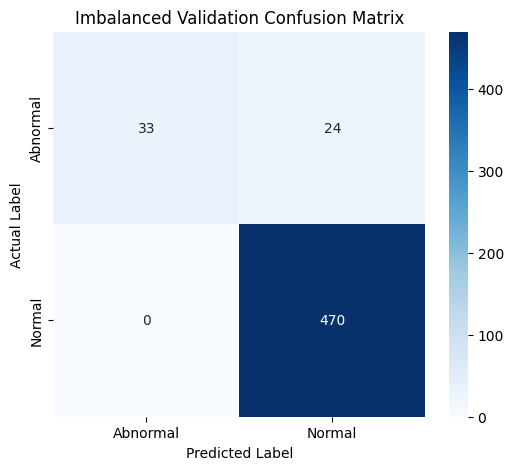

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

print("--- Starting Experiment 1: Imbalanced SVM ---")
scaler_imbalanced = StandardScaler()
X_train_imbalanced_scaled = scaler_imbalanced.fit_transform(X_train_orig)

X_val_scaled = scaler_imbalanced.transform(X_val_orig)

print("Training SVM (Imbalanced Baseline)...")
svm_imbalanced = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_imbalanced.fit(X_train_imbalanced_scaled, y_train_orig)
print("SVM training complete.")

y_pred_val_imbalanced = svm_imbalanced.predict(X_val_scaled)
y_prob_val_imbalanced = svm_imbalanced.predict_proba(X_val_scaled)[:, 1]

print("\n--- Validation Results (Imbalanced SVM) ---")
print(classification_report(y_val_orig, y_pred_val_imbalanced, target_names=['Normal (0)', 'Abnormal (1)']))

tn, fp, fn, tp = confusion_matrix(val_y_orig, y_pred_val_imbalanced, labels=[0, 1]).ravel()
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
auc = roc_auc_score(val_y_orig, y_prob_val_imbalanced)
print(f"Positive Predictive Value (PPV): {ppv:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")
print(f"Area Under Curve (AUC):        {auc:.4f}")

print("\nImbalanced Validation Confusion Matrix:")

plot_confusion_matrix(val_y_orig, y_pred_val_imbalanced, title='Imbalanced Validation Confusion Matrix')

### Experiment 1 - Imbalanced SVM (Raw Baseline) results interpretation

This model was trained on the original, imbalanced data (~89% Normal / 11% Abnormal). The following metrics are from the validation set.

* **Class Definitions:**
    * **Positive (1):** "Abnormal" (the class we need to find)
    * **Negative (0):** "Normal"

---

* **Accuracy: 0.95 (95%)**
    * **Definition:** The percentage of all correct predictions.
    * **Finding:** This score is **misleadingly high**. The model is biased toward the "Normal" majority class.

* **Recall (Sensitivity) for 'Abnormal' (1): 0.58 (58%)**
    * **Definition:** The percentage of *actual* 'Abnormal' cases the model correctly found.
    * **Finding:** This is the **model's critical failure**. It **missed 42% of 'Abnormal' patients** (24 False Negatives), making it clinically unreliable.

* **Precision (PPV) for 'Abnormal' (1): 1.00 (100%)**
    * **Definition:** When the model *predicts* 'Abnormal', the percentage of time it is correct.
    * **Finding:** This score is misleading. It's high because the model is so conservative it **produced 0 False Positives** at the expense of 24 False Negatives.

* **Negative Predictive Value (NPV): 0.9514 (95.1%)**
    * **Definition:** When the model *predicts* 'Normal', the probability that the patient is *actually* 'Normal'. This is a key metric for a screening tool.
    * **Finding:** This is a **dangerous result**. It indicates a ~4.9% chance that a patient cleared as "Normal" is actually "Abnormal."

* **F1-Score for 'Abnormal' (1): 0.73**
    * **Definition:** The balanced average of Precision and Recall.
    * **Finding:** This score is artificially inflated by the misleading 1.00 Precision and masks the model's poor 0.58 Recall.

### Conclusion (Experiment 1)

The imbalanced SVM is a **failure**. It's a "lazy" classifier that gets a high accuracy by ignoring the 'Abnormal' minority class. It fails at its primary task of finding sick patients (low Recall) and is unreliable at clearing healthy ones (low NPV). This result clearly proves that **data augmentation is necessary**.

### Experiment 2.1 - Balanced SVM (Strong Baseline)


--- Starting Experiment 2.1: Balanced SVM ---
Total balanced training samples: 3539
Training SVM (Balanced baseline)...
SVM training complete.

--- Validation Results (Balanced SVM) ---
              precision    recall  f1-score   support

  Normal (0)       1.00      0.90      0.94       470
Abnormal (1)       0.53      0.98      0.69        57

    accuracy                           0.91       527
   macro avg       0.77      0.94      0.82       527
weighted avg       0.95      0.91      0.92       527

Positive Predictive Value (PPV): 0.5333
Negative Predictive Value (NPV): 0.9976
Area Under Curve (AUC):        0.9894

Balanced Validation Confusion Matrix:


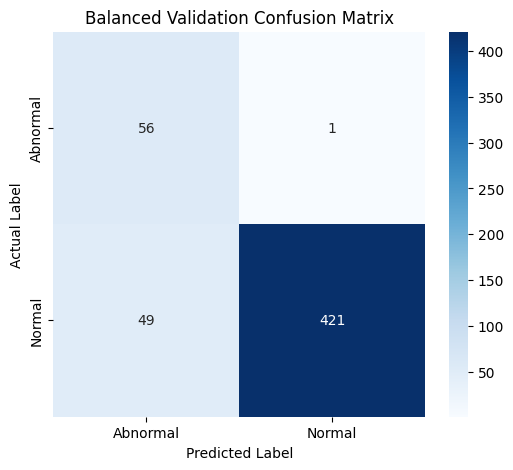

In [47]:
print("\n--- Starting Experiment 2.1: Balanced SVM ---")
# vertically stack x_train_orig and x_train_aug into one NumPy array
X_train_balanced = np.vstack((X_train_orig, X_train_aug))
# concatenate the labels of train_orig and train_aug into one NumPy array
y_train_balanced = np.concatenate((y_train_orig, y_train_aug))
print(f"Total balanced training samples: {X_train_balanced.shape[0]}")

# scale data
scaler_balanced = StandardScaler()
X_train_balanced_scaled = scaler_balanced.fit_transform(X_train_balanced)
X_val_balanced_scaled = scaler_balanced.transform(X_val_orig)

# train svm
print("Training SVM (Balanced baseline)...")
svm_balanced = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_balanced.fit(X_train_balanced_scaled, y_train_balanced)
print("SVM training complete.")

# evaluate svm on validation set
y_pred_val_balanced = svm_balanced.predict(X_val_balanced_scaled)
# calculate the probability of the samples being abnormal
y_prob_val_balanced = svm_balanced.predict_proba(X_val_balanced_scaled)[:, 1]

print("\n--- Validation Results (Balanced SVM) ---")
print(classification_report(val_y_orig, y_pred_val_balanced, target_names=['Normal (0)', 'Abnormal (1)']))

tn, fp, fn, tp = confusion_matrix(val_y_orig, y_pred_val_balanced, labels=[0, 1]).ravel()
ppv_balanced = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_balanced = tn / (tn + fn) if (tn + fn) > 0 else 0
auc_balanced = roc_auc_score(val_y_orig, y_prob_val_balanced)


print(f"Positive Predictive Value (PPV): {ppv_balanced:.4f}")
print(f"Negative Predictive Value (NPV): {npv_balanced:.4f}")
print(f"Area Under Curve (AUC):        {auc_balanced:.4f}")

print("\nBalanced Validation Confusion Matrix:")
plot_confusion_matrix(val_y_orig, y_pred_val_balanced, title='Balanced Validation Confusion Matrix')


### Experiment 2.1 - Balanced SVM (Strong Baseline) results interpretation

This model was trained on the balanced, augmented dataset (~53% Normal / 47% Abnormal). The metrics are from the same validation set.

* **Class Definitions:**
    * **Positive (1):** "Abnormal"
    * **Negative (0):** "Normal"

---

* **Accuracy: 0.91 (91%)**
    * **Definition:** The percentage of all correct predictions.
    * **Finding:** The accuracy is slightly lower, which is an expected and acceptable trade-off for a model that is no longer "lazy" and is now correctly identifying more 'Abnormal' cases.

* **Recall (Sensitivity) for 'Abnormal' (1): 0.98 (98%)**
    * **Definition:** The percentage of *actual* 'Abnormal' cases the model correctly found.
    * **Finding:** This is the **critical success** of this experiment. The model now **finds 98% of 'Abnormal' patients**, missing only 1 (compared to 24 before).

* **Precision (PPV) for 'Abnormal' (1): 0.53 (53%)**
    * **Definition:** When the model *predicts* 'Abnormal', the percentage of time it is correct.
    * **Finding:** This is the **expected trade-off** for achieving high recall. The model now has 49 False Positives, which is acceptable in a screening tool where missing a case (a False Negative) is far worse.

* **Negative Predictive Value (NPV): 0.9976 (99.8%)**
    * **Definition:** When the model *predicts* 'Normal', the probability that the patient is *actually* 'Normal'.
    * **Finding:** This is an **excellent, clinically significant** result. We can be 99.8% confident that a "Normal" prediction is correct.

* **F1-Score for 'Abnormal' (1): 0.69**
    * **Definition:** The balanced average of Precision and Recall.
    * **Finding:** This score is now correctly penalized by the low 0.53 Precision. This confirms that for our screening goal, **Recall (0.98)** and **NPV (0.998)** are the more important metrics to focus on.

### Conclusion (Experiment 2.1)

This experiment is a **complete success**. It proves that our data augmentation strategy was essential. We have created a robust and reliable baseline model that is vastly superior as a clinical screening tool. This **Balanced SVM** is now our strong, scientifically-backed baseline to beat.

In [ ]:
# processed_dir = f'{DATA_FOLDER}/processed_data'

# try:
#   # get the filename of the first training sample
#   file_name = f"{train_x_orig[0]}.npy"
#   mel_path = os.path.join(processed_dir, 'train_orig', 'mel_spec', file_name)

#   print(f"Loading Mel spec file: {mel_path}")

#   mel_data = np.load(mel_path)
#   print(f"Mel spec load successful. Shape: {mel_data.shape}")

#   feat_path = os.path.join(processed_dir, 'train_orig', '1d_features', file_name)
#   print(f"\nLoading 1d_features file: {feat_path}")

#   feat_data = np.load(feat_path)
#   print(f" 1d_features load successful. Shape: {feat_data.shape}")

# except Exception as e:
#     print(f"ERROR loading Mel spec file: {e}")

Define custom PCG_Dataset class and dataloader to load and process samples

In [ ]:
# import torch
# from torch.utils.data import Dataset

# class PCG_Dataset(Dataset):
#   """
#   Custom PyTorch Dataset for loading PCG features.
#   Loads both the 2D Mel spectrogram and the 1D features for a single sample
#   """

#   def __init__(self, filenames, labels, base_dir):
#     """
#     Initialise the dataset.

#     Args:
#         filenames (list): A list of filenames (e.g., ['e01004', 'e00236', ...])
#         labels (list): A list of corresponding labels (e.g., [0, 0, ...])
#         base_dir (str): The root path for this dataset
#                              (e.g., '.../processed_data/train_orig')
#     """

#     self.filenames = filenames
#     self.labels = labels
#     self.base_dir = base_dir

#   def __len__(self):
#     """
#     Number of samples in the dataset.
#     """
#     return len(self.filenames)

#   def __getitem__(self, idx):
#     """
#     Loads and returns one sample (features and label) from the disk.
#     'idx' is the index (e.g. 5) of the sample to fetch.
#     """

#     filename = self.filenames[idx]
#     label = self.labels[idx]

#     mel_path = os.path.join(self.base_dir, 'mel_spec', f"{filename}.npy")
#     feature_path = os.path.join(self.base_dir, '1d_features', f"{filename}.npy")

#     try:
#         mel_data = np.load(mel_path)
#         feature_data = np.load(feature_path)
#     except FileNotFoundError:
#       print(f"Error: Could not find feature files for {filename} at {self.base_dir}")
#       # Return empty tensors on error
#       return torch.zeros(1, N_MELS, 20), torch.zeros(88), torch.zeros(1) # Adjust shapes if needed

#     # convert features to PyTorch tensors
#     # Mel spec: [H, W] -> [1, H, W] (adds a channel dimension for CNNs)
#     # Using .astype(np.float32) for compatibility

#     mel_tensor = torch.tensor(mel_data.astype(np.float32)).unsqueeze(0)

#     # 1D features: [F]
#     feat_tensor = torch.tensor(feat_data.astype(np.float32))

#     # Label: e.g., 0 -> [0.0] (for loss calculation like BCEWithLogitsLoss)
#     label_tensor = torch.tensor(label, dtype=torch.float32).unsqueeze(0)

#     # Return all three tensors
#     return mel_tensor, feat_tensor, label_tensor




In [ ]:
# from torch.utils.data import DataLoader, ConcatDataset

# processed_data_dir = f'{DATA_FOLDER}/processed_data'

# train_orig_dir = os.path.join(processed_data_dir, 'train_orig')
# train_aug_dir = os.path.join(processed_data_dir, 'train_aug')
# val_orig_dir = os.path.join(processed_data_dir, 'val_orig')
# test_orig_dir = os.path.join(processed_data_dir, 'test_orig')

# # create dataset instances
# val_dataset = PCG_Dataset(
#     filenames=val_x_orig,
#     labels=val_y_orig,
#     base_dir=val_orig_dir
# )

# test_dataset = PCG_Dataset(
#     filenames=test_x_orig,
#     labels=test_y_orig,
#     base_dir=test_orig_dir
# )

# train_baseline_dataset = PCG_Dataset(
#     filenames=train_x_orig,
#     labels=train_y_orig,
#     base_dir=train_orig_dir
# )

# # train_orig part of concatenated train_augmented_dataset
# train_orig_part = PCG_Dataset(
#     filenames=train_x_orig,
#     labels=train_y_orig,
#     base_dir=train_orig_dir
# )

# # train_aug part of concatenated train_augmented_dataset
# train_aug_part = PCG_Dataset(
#     filenames=train_x_aug,
#     labels=train_y_aug,
#     base_dir=train_aug_dir
# )

# # concatenate both original and augmented dataset into one
# train_augmented_dataset = ConcatDataset([train_orig_part, train_aug_part])
# print(f"Total samples in Baseline Training set: {len(train_baseline_dataset)}")
# print(f"Total samples in Augmented Training set: {len(train_augmented_dataset)}")
# print(f"Total samples in Validation set: {len(val_dataset)}")
# print(f"Total samples in Test set: {len(test_dataset)}")


Defining dataloaders for the datasets and testing one batch to verify the feature shapes.


### Expected Outcome

1.  **Mel Spec:** The `[32, 1, 128, 20]` shape matches the `(Batch, Channel, Height, Width)` format. This 4D tensor is the exact input required by a PyTorch 2D CNN.
2.  **1D Features:** The `[32, 88]` shape matches `(Batch, Num_Features)`. This 2D tensor is the input for our 1D classifier (SVM, MLP, etc.).
3.  **Labels:** The `[32, 1]` shape matches `(Batch, Label)`, which is the standard format for binary loss functions like `BCEWithLogitsLoss`.

In [ ]:
# BATCH_SIZE = 32
# NUM_WORKERS = 4

# train_baseline_loader = DataLoader(
#     dataset=train_baseline_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=True, # Automatically shuffles the data every epoch
#     num_workers=NUM_WORKERS
# )

# train_augmented_loader = DataLoader(
#     dataset=train_augmented_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=True,
#     num_workers=NUM_WORKERS
# )

# val_loader = DataLoader(
#     dataset=val_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=False, # No shuffling validation and test data
#     num_workers=NUM_WORKERS
# )

# test_loader = DataLoader(
#     dataset=test_dataset,
#     batch_size=BATCH_SIZE,
#     shuffle=False,
#     num_workers=NUM_WORKERS
# )

# print("Testing the train_loader by using one batch...")
# try:
#     batch_mel, batch_feat, batch_labels = next(iter(train_baseline_loader))

#     print(f"  Mel spec batch shape: {batch_mel.shape}")
#     print(f"  1D features batch shape: {batch_feat.shape}")
#     print(f"  Labels batch shape: {batch_labels.shape}")
# except Exception as e:
#     print(f"Error while testing loader: {e}")


